In [5]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import sys
sys.path.append("../../src")

from graph_tools import create_graph_from_adj_mat
from optimization_funcs import multi_pass_optimize
from optimization_funcs import simulated_annealing
from optimization_funcs import hamiltonian_objective_function
from optimization_funcs import flip_step_function

In [6]:
""" load the graph """
curr_year = 2012
interval = 4
path = f"../../out/belief networks/{curr_year}-{curr_year + interval}, R=0.2, Condition=None"

adj_mat, var_list = get_sorted_adj_mat_and_var_list(path)
G = create_graph_from_adj_mat(adj_mat, var_list)

In [8]:
""" find energy minima, and find how often each edge is frustrated """

initial_vectors = np.random.choice([-1, 0, 1], size=(1000, 102))
mp_minima, num_changed = multi_pass_optimize(initial_vectors, adj_mat, max_iterations=int(1e4))
frust_mat = get_frust_mat(adj_mat, mp_minima)
frust_percentage = get_frust_percentage(frust_mat)

(array([230.,  34.,  22.,  20.,  30.,  32.,   8.,  20.,  28.,   4.,  24.,
         26.,  26.,  22.,  66.,  42.,  36.,  12.,  24.,  20.]),
 array([0.    , 0.0262, 0.0524, 0.0786, 0.1048, 0.131 , 0.1572, 0.1834,
        0.2096, 0.2358, 0.262 , 0.2882, 0.3144, 0.3406, 0.3668, 0.393 ,
        0.4192, 0.4454, 0.4716, 0.4978, 0.524 ]),
 <BarContainer object of 20 artists>)

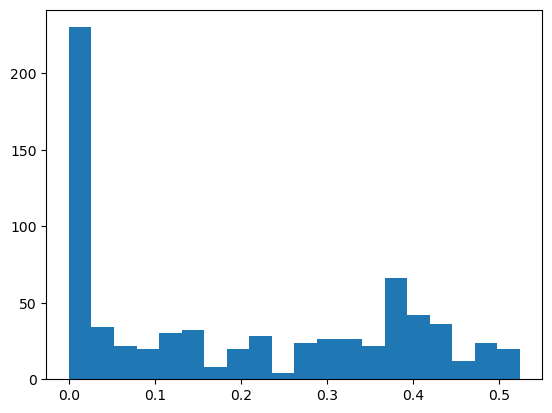

In [9]:
""" make a histogram of the frustrations """

plt.hist(frust_percentage[adj_mat != 0], bins=20)


In [10]:
""" Find energy minima using simulated annealing, and see how often each edge is frustrated """

initial_vectors = np.random.choice([-1, 0, 1], size=(1000, 102))
sa_minima, costs = simulated_annealing(initial_vectors, 100, 0.99, int(1e5), 
                              lambda vecs: hamiltonian_objective_function(vecs, adj_mat),
                              lambda vecs: flip_step_function(vecs, num_flips=1))


c:\Users\vicvi\BeliefNetworkEvo\MESSY\nbk\analyses\../../src\optimization_funcs.py:71: RuntimeWarning: overflow encountered in exp
  acceptance_prob_vector = np.where(new_cost_vector < old_cost_vector, 1, np.exp((old_cost_vector - new_cost_vector) / temperature))


In [11]:
""" calculate the frustration for the simulated annealing minima """

frust_mat_sa = get_frust_mat(adj_mat, sa_minima)
frust_percentage_sa = get_frust_percentage(frust_mat_sa)

(array([276.,  14.,  48.,  30.,  12.,  26.,  44.,   0.,  14.,  38.,  32.,
         18.,  54.,  20.,  42.,  10.,  30.,  14.,   0.,   4.]),
 array([0.     , 0.02835, 0.0567 , 0.08505, 0.1134 , 0.14175, 0.1701 ,
        0.19845, 0.2268 , 0.25515, 0.2835 , 0.31185, 0.3402 , 0.36855,
        0.3969 , 0.42525, 0.4536 , 0.48195, 0.5103 , 0.53865, 0.567  ]),
 <BarContainer object of 20 artists>)

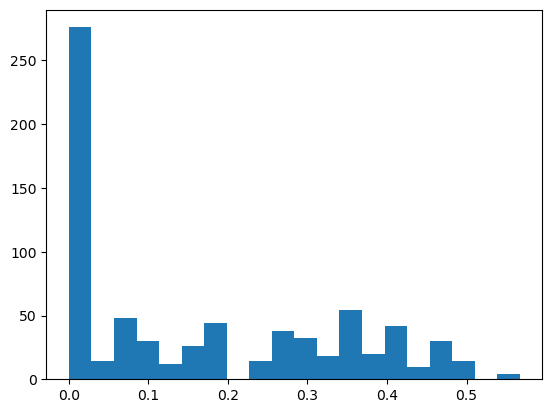

In [12]:
""" make a histogram of the frustrations """

plt.hist(frust_percentage_sa[adj_mat != 0], bins=20)

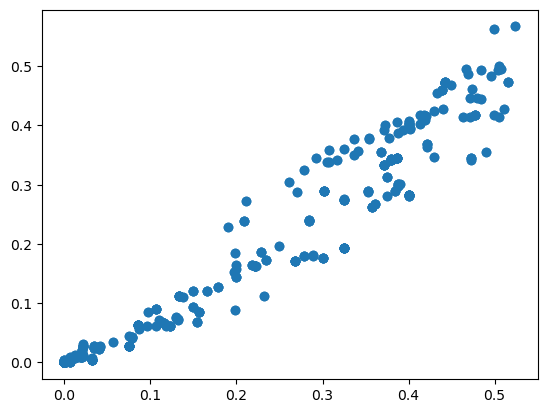

In [13]:
plt.scatter(frust_percentage[adj_mat != 0], frust_percentage_sa[adj_mat != 0])

In [14]:
sorted_indices = np.unravel_index(np.argsort(frust_percentage, axis=None), frust_percentage.shape)

for i, j in zip(*sorted_indices):
    print(f"{var_list[i]} -> {var_list[j]}")

XMARSEX -> TVHOURS
ABANY -> FECHLD
TVHOURS -> POSTLIFE
ABANY -> FEPOL
ABANY -> FEPRESCH
ABANY -> GETAHEAD
TVHOURS -> PRAYER
ABANY -> GUNLAW
ABANY -> HELPFUL
ABANY -> HELPPOOR
TVHOURS -> PREMARSX
ABANY -> LETDIE1
ABANY -> LIBATH
ABANY -> LIBCOM
ABANY -> LIBHOMO
ABANY -> LIBMIL
ABANY -> LIBMSLM
ABANY -> LIBRAC
ABANY -> NATAID
ABANY -> NATARMS
ABANY -> NATCHLD
ABANY -> NATCITY
ABANY -> NATCRIME
ABANY -> NATDRUG
XMARSEX -> XMARSEX
ABANY -> NATENVIR
ABANY -> NATFARE
ABANY -> NATHEAL
ABANY -> NATMASS
ABANY -> NATPARK
ABANY -> NATRACE
ABANY -> NATROAD
XMARSEX -> WRKWAYUP
XMARSEX -> NEWS
XMARSEX -> PARTYID
XMARSEX -> POLABUSE
XMARSEX -> POLATTAK
XMARSEX -> POLESCAP
XMARSEX -> POLHITOK
XMARSEX -> POLMURDR
XMARSEX -> POLVIEWS
XMARSEX -> PORNLAW
XMARSEX -> POSTLIFE
XMARSEX -> PRAYER
XMARSEX -> PREMARSX
XMARSEX -> PRESLAST_DEMREP
XMARSEX -> PRESLAST_NONCONFORM
XMARSEX -> RACDIF1
XMARSEX -> RACDIF2
XMARSEX -> RACDIF3
XMARSEX -> RACDIF4
XMARSEX -> RELITEN
XMARSEX -> SEXEDUC
XMARSEX -> SPANKING
XMARS

In [16]:
sorted_indices_sa = np.unravel_index(np.argsort(frust_percentage_sa, axis=None), frust_percentage_sa.shape)

for i, j in zip(*sorted_indices_sa):
    print(f"{var_list[i]} -> {var_list[j]}")

XMARSEX -> TVHOURS
ABANY -> FECHLD
TVHOURS -> PARTYID
ABANY -> FEPOL
ABANY -> FEPRESCH
ABANY -> GETAHEAD
TVHOURS -> POLABUSE
ABANY -> GUNLAW
ABANY -> HELPFUL
ABANY -> HELPPOOR
TVHOURS -> POLATTAK
ABANY -> LETDIE1
ABANY -> LIBATH
ABANY -> LIBCOM
ABANY -> LIBHOMO
ABANY -> LIBMIL
ABANY -> LIBMSLM
ABANY -> LIBRAC
ABANY -> NATAID
ABANY -> NATARMS
ABANY -> NATCHLD
ABANY -> NATCITY
ABANY -> NATCRIME
ABANY -> NATDRUG
XMARSEX -> XMARSEX
ABANY -> NATENVIR
ABANY -> NATFARE
ABANY -> NATHEAL
ABANY -> NATMASS
ABANY -> NATPARK
ABANY -> NATRACE
ABANY -> NATROAD
XMARSEX -> WRKWAYUP
XMARSEX -> NEWS
XMARSEX -> PARTYID
XMARSEX -> POLABUSE
XMARSEX -> POLATTAK
XMARSEX -> POLESCAP
XMARSEX -> POLHITOK
XMARSEX -> POLMURDR
XMARSEX -> POLVIEWS
XMARSEX -> PORNLAW
XMARSEX -> POSTLIFE
XMARSEX -> PRAYER
XMARSEX -> PREMARSX
XMARSEX -> PRESLAST_DEMREP
XMARSEX -> PRESLAST_NONCONFORM
XMARSEX -> RACDIF1
XMARSEX -> RACDIF2
XMARSEX -> RACDIF3
XMARSEX -> RACDIF4
XMARSEX -> RELITEN
XMARSEX -> SEXEDUC
XMARSEX -> SPANKING
XMAR

In [81]:
""" get a set of vector assignments by doing breadth first search on the graph"""

bfs_vectors = np.zeros((1000, 102))
for i in range(1000):
    assignments = assign_nodes_search(G, breadth_first=True)
    
    for j, node in enumerate(var_list):
        bfs_vectors[i, j] = assignments[node][0]  

(array([488., 166.,  20.,  10.,  10.,   8.,   0.,   2.,   0.,   4.,   0.,
          0.,   0.,   0.,   2.,   2.,   8.,   0.,   4.,   2.]),
 array([0.     , 0.03225, 0.0645 , 0.09675, 0.129  , 0.16125, 0.1935 ,
        0.22575, 0.258  , 0.29025, 0.3225 , 0.35475, 0.387  , 0.41925,
        0.4515 , 0.48375, 0.516  , 0.54825, 0.5805 , 0.61275, 0.645  ]),
 <BarContainer object of 20 artists>)

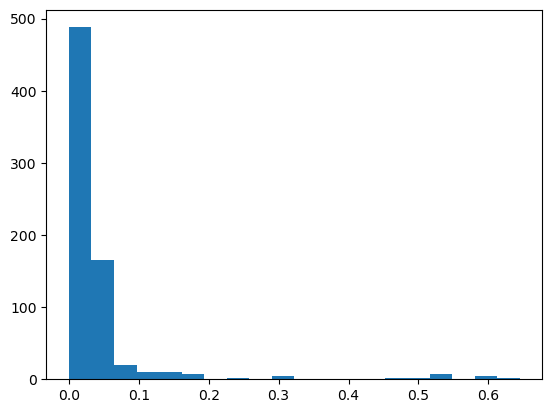

In [82]:
frust_mat_bfs = get_frust_mat(adj_mat, bfs_vectors)
frust_percentage_bfs = get_frust_percentage(frust_mat_bfs)

""" make a histogram of the frustrations """
plt.hist(frust_percentage_bfs[adj_mat != 0], bins=20)

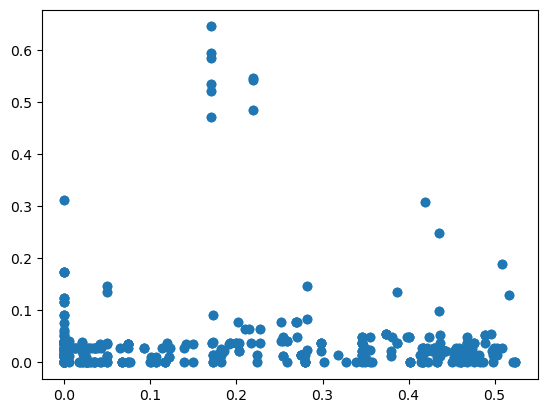

In [83]:
plt.scatter(frust_percentage[adj_mat != 0], frust_percentage_bfs[adj_mat != 0])

In [78]:
""" get a set of vector assignments by doing a random walk first search on the graph"""

rw_vectors = np.zeros((1000, 102))
for i in range(100):
    assignments = assign_nodes_random_walk(G, weighted=True, iterations_per_node=100)
    
    for j, node in enumerate(var_list):
        rw_vectors[i, j] = assignments[node] 

(array([576.,  72.,  28.,  24.,   6.,   4.,   4.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   6.,   0.,   0.,   4.]),
 array([0.     , 0.00375, 0.0075 , 0.01125, 0.015  , 0.01875, 0.0225 ,
        0.02625, 0.03   , 0.03375, 0.0375 , 0.04125, 0.045  , 0.04875,
        0.0525 , 0.05625, 0.06   , 0.06375, 0.0675 , 0.07125, 0.075  ]),
 <BarContainer object of 20 artists>)

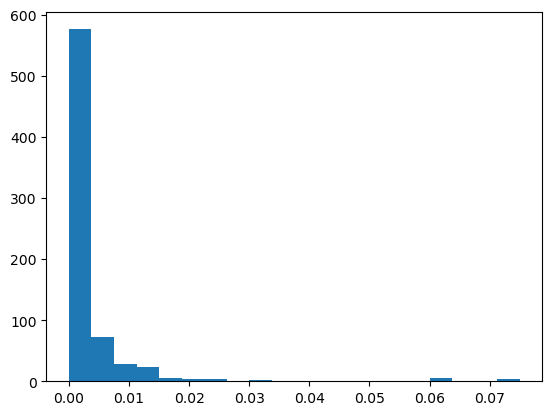

In [84]:
frust_mat_rw = get_frust_mat(adj_mat, rw_vectors)
frust_percentage_rw = get_frust_percentage(frust_mat_rw)

""" make a histogram of the frustrations """
plt.hist(frust_percentage_rw[adj_mat != 0], bins=20)

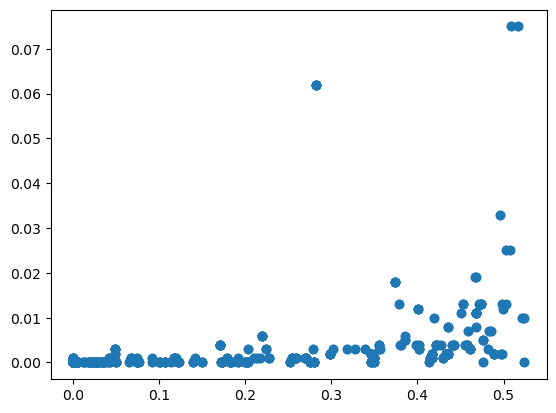

In [85]:
plt.scatter(frust_percentage[adj_mat != 0], frust_percentage_rw[adj_mat != 0])

In [28]:
test_adj_mat = np.array([[1, 2, 3],
                         [4, 5, 6],
                         [7, 8, 9]])

test_vectors = np.array([[-1,  1, -1],
                         [ 1, -1,  1],
                         [-1, -1,  1],
                         [ 1, -1, -1],
                         [-1, -1, -1]])

expected_quad_form = np.array([[[1, -2, 3],[-4, 5, -6],[7, -8, 9]],
                               [[1, -2, 3],[-4, 5, -6],[7, -8, 9]],
                               [[1,  2, -3],[4, 5, -6],[-7, -8, 9]],
                               [[1, -2, -3],[-4, 5, 6],[-7, 8, 9]],
                               [[1, 2, 3],[4, 5, 6], [7, 8, 9]]])

np.testing.assert_array_equal(expected_quad_form, get_frust_mat(test_adj_mat, test_vectors))